# Business Understanding
## 1. Objective
The primary goal of this project is to evaluate aviation risks to identify aircraft that are low-risk for 
the company to purchase and operate. By analyzing historical event data, this analysis will provide actionable 
insights into aircraft safety, operational reliability, and risk factors associated with different aircraft models and flight operations.

## 2. Problem Statement
The company aims to enter the aviation industry but lacks knowledge about safety and operational risks. 
Without a data-driven approach, there is a risk of purchasing aircraft prone to accidents or high 
maintenance costs, leading to financial and reputational damage. This project will help identify patterns 
in historical aviation event data to guide safe and cost-effective aircraft acquisitions.

### The Key Questions that we should ask:
1. Which aircraft models have the lowest rates of accidents or incidents?
2. What types of events are most common for specific aircraft categories or purposes of flight?
3. Are there any patterns related to the phase of flight, weather conditions, or injury severity?
4. How do aircraft make and model correlate with safety outcomes?

## 3. Metrics of Success
### Business Metrics:
- **Risk Reduction**: Recommendations should reduce the likelihood of safety incidents by focusing on low-risk aircraft models.
- **Safety Insights**: Provide insights into key risk factors (e.g., weather, flight phase) to inform operational decisions.
- **Operational Reliability**: Aircraft recommendations should prioritize those with fewer historical incidents.

### Technical Metrics:
- **Event Analysis**: Comprehensive analysis of incidents categorized by aircraft make, model, and operational context.
- **Risk Indicators**: Development of a risk index for each aircraft model based on historical event data.

## 4. External Relevance
### Constraints:
- Historical event data may not fully capture all relevant risk factors (e.g., pilot behavior, maintenance quality).
- Data may have inconsistencies or missing values, especially for older events.

### Assumptions:
- Historical safety trends for aircraft are indicative of future risks.
- The dataset includes all major factors relevant to assessing aircraft risk.
- Data quality is sufficient for building reliable insights.

# Data Understanding

In [1]:
# importing the necessary python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# loading the dataset using pandas
df = pd.read_csv('AviationData.csv', encoding='latin1')
df_USState_codes = pd.read_csv('USState_Codes.csv')

/tmp/ipykernel_43300/1156056486.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1')


## 1. Overview of the available Data
The dataset provided for this project includes information on various aircraft event history that occured in various parts of the US. 
It also contains information on the aircraft category, name and other features. 
This data is sourced from a Kaggle puplication.

## Key features
- **Event Details**: 
  - `Event.Id`, `Event.Date`, `Location`, `Country`, `Weather.Condition`, `Broad.phase.of.flight`
- **Aircraft Details**:
  - `Make`, `Model`, `Aircraft.damage`, `Aircraft.Category`, `Number.of.Engines`, `Engine.Type`
- **Injury and Severity**:
  - `Injury.Severity`, `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`
- **Operational Context**:
  - `Purpose.of.flight`, `Schedule`, `Air.carrier`, `FAR.Description`

In [3]:
# Getting a small overview of the first 5 rows of the data frame
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df_USState_codes.head(10)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [5]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## 2. Statistical Summary
- The Dataset contains 88889 records and 30 features
- Some features contain missing values

In [6]:
# Getting to know more about the dataset by accessing its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
# getting the statistical summary of various features with numeric entries
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [8]:
#getting the shape of the dataset
df.shape

(88889, 31)

In [9]:
#describing the dataset features
df.describe(include='O').T

,count,unique,top,freq
Event.Id,88889,87951,20001212X19172,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,CEN22LA149,2
Event.Date,88889,14782,1984-06-30,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50132,10374,NONE,1488
Airport.Name,52704,24870,Private,240


In [10]:
# getting the column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## 3. Data Quality Assessment
### Completeness:
- **Strengths**:
  - Most critical features, such as `Make`, `Model`, and `Event.Date`, are well-populated.
  - Injury-related columns provide a detailed breakdown of the impact on passengers and crew.
- **Weaknesses**:
  - Missing values may exist in columns like `Latitude`, `Longitude`, `Airport.Code`, and `Airport.Name`.
  - `Weather.Condition` and `Broad.phase.of.flight` might have some missing or ambiguous entries.

### Accuracy:
- Details like `Event.Date` and `Registration.Number` are likely accurate due to regulatory requirements.

In [11]:
## Completeness
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

## 4. Key Questions for Data Exploration
- What are the most common causes or types of events for specific aircraft models?
- Are certain flight phases (e.g., takeoff, landing) associated with higher incident rates?
- How does weather condition influence event severity?
- What correlations exist between aircraft damage and injury severity?

## 5. Next Steps
1. **Data Cleaning**
- Handle missing values in columns by dropping them or filling the entries
- Check for missingssing values in different features and standardize them
- Drop Unecessary columns that would not be needed in the DA
2. **Exploratory Data Analysis**
- Analyze trends in incidents by aircraft make, model, and category.
- Visualize relationships between weather, flight phase, and event severity.
- Identify geographical hotspots for aviation incidents.
3. **Feature Engineering**:
- Create derived features, such as `Fatality Rate` (fatal injuries / total injuries).
- Generate a risk score for each aircraft model based on incident frequency and severity.

# Data Preparation/ Data Cleaning

In [12]:
# check for null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [13]:
#check for duplicate values
df.duplicated().sum()

0

## 1. Dropping columns with over 50% of missing values and dropping duplicate values

In [14]:
#replacing period (.) with underscore (_) in the columns 
df.columns = df.columns.str.replace('.','_')

In [15]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [16]:
# Calculate teh percentage of missing values in the records
records = len(df)
missing_values = df.isna().sum()
percentage_missing = (missing_values / records) * 100

In [17]:
percentage_missing

Event_Id                   0.000000
Investigation_Type         0.000000
Accident_Number            0.000000
Event_Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport_Code              43.601570
Airport_Name              40.708074
Injury_Severity            1.124999
Aircraft_damage            3.593246
Aircraft_Category         63.677170
Registration_Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur_Built              0.114750
Number_of_Engines          6.844491
Engine_Type                7.982990
FAR_Description           63.974170
Schedule                  85.845268
Purpose_of_flight          6.965991
Air_carrier               81.271023
Total_Fatal_Injuries      12.826109
Total_Serious_Injuries    14.073732
Total_Minor_Injuries      13.424608
Total_Uninjured            6.650992
Weather_Condition          5

In [18]:
#placing the percentage in a dataframe
percentage_missing_df = pd.DataFrame({'Missing' : percentage_missing})

# sorting the df
percentage_missing_df.sort_values('Missing', ascending = False, inplace = True)

percentage_missing_df

,Missing
Schedule,85.845268
Air_carrier,81.271023
FAR_Description,63.974170
Aircraft_Category,63.677170
Longitude,61.330423
Latitude,61.320298
Airport_Code,43.601570
Airport_Name,40.708074
Broad_phase_of_flight,30.560587
Publication_Date,15.492356


In [19]:
#displaying columns with more than 10% of missing values
percentage_missing_df[percentage_missing_df['Missing'] > 10]

,Missing
Schedule,85.845268
Air_carrier,81.271023
FAR_Description,63.974170
Aircraft_Category,63.677170
Longitude,61.330423
Latitude,61.320298
Airport_Code,43.601570
Airport_Name,40.708074
Broad_phase_of_flight,30.560587
Publication_Date,15.492356


In [20]:
# dropping columns with over 50% of missing values
# create a list of the columns to drop 
columns_drop = list(percentage_missing_df[percentage_missing_df['Missing'] > 50].index)

#dropping the columns
df.drop(columns = columns_drop, axis = 1, inplace = True)

df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Airport_Code', 'Airport_Name',
       'Injury_Severity', 'Aircraft_damage', 'Registration_Number', 'Make',
       'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status', 'Publication_Date'],
      dtype='object')

In [21]:
# checking the columns that were droped
columns_drop

['Schedule',
 'Air_carrier',
 'FAR_Description',
 'Aircraft_Category',
 'Longitude',
 'Latitude']

In [22]:
#checking the df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport_Code            50132 non-null  object 
 7   Airport_Name            52704 non-null  object 
 8   Injury_Severity         87889 non-null  object 
 9   Aircraft_damage         85695 non-null  object 
 10  Registration_Number     87507 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur_Built           88787 non-null  object 
 14  Number_of_Engines       82805 non-null

In [23]:
# Drop rows where Registration_Number is missing
df.dropna(subset=['Registration_Number'], inplace=True)

## 2. Check for missing values in different features and standardize them

In [24]:
df.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     30
Country                     221
Airport_Code              37470
Airport_Name              34912
Injury_Severity             977
Aircraft_damage            3011
Registration_Number           0
Make                         24
Model                        54
Amateur_Built                33
Number_of_Engines          4860
Engine_Type                6179
Purpose_of_flight          5619
Total_Fatal_Injuries      10835
Total_Serious_Injuries    11599
Total_Minor_Injuries      10951
Total_Uninjured            5112
Weather_Condition          4091
Broad_phase_of_flight     25881
Report_Status              6352
Publication_Date          13544
dtype: int64

In [25]:
# Fill missing values for categorical columns since we have already dropped columns with over 50% missing values
categorical_columns = [
    'Location', 'Injury_Severity', 'Make', 'Model', 
    'Amateur_Built', 'Purpose_of_flight', 'Weather_Condition', 
    'Broad_phase_of_flight', 'Report_Status','Aircraft_damage'
]

# Fill missing values with "Unknown" for each column in the list
for column in categorical_columns:
    df[column].fillna("Unknown", inplace=True)

In [26]:
#lets fill the columns with numerical values with mean or median or mode

# Handle missing values in Engine_Type based on mode
df['Engine_Type'].fillna(df['Engine_Type'].mode()[0], inplace=True)

# Handling missing values in Number of engines with the median
df['Number_of_Engines'].fillna(df['Number_of_Engines'].median(), inplace=True)

# handling missing values in Total fatal,minor,serious and uninjured columns with the mean
numerical_injuries_columns = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 
                     'Total_Minor_Injuries', 'Total_Uninjured']

# Calculate the mean for each column and fill missing values
for column in numerical_injuries_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [27]:
df.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                     221
Airport_Code              37470
Airport_Name              34912
Injury_Severity               0
Aircraft_damage               0
Registration_Number           0
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
Purpose_of_flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight         0
Report_Status                 0
Publication_Date          13544
dtype: int64

In [28]:
# checking ehich country had the most events
df['Country'].value_counts()

Country
United States               82132
Brazil                        336
Canada                        305
Mexico                        294
United Kingdom                284
                            ...  
Chad                            1
Yemen                           1
Reunion                         1
Nauru                           1
Turks and Caicos Islands        1
Name: count, Length: 205, dtype: int64

In [29]:
# Droping records where events didn't occur in the US since 
df = df[df['Country'] == 'United States']

# check if the only unique value in country is the US
df['Country'].unique()

array(['United States'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82132 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                82132 non-null  object 
 1   Investigation_Type      82132 non-null  object 
 2   Accident_Number         82132 non-null  object 
 3   Event_Date              82132 non-null  object 
 4   Location                82132 non-null  object 
 5   Country                 82132 non-null  object 
 6   Airport_Code            49017 non-null  object 
 7   Airport_Name            51513 non-null  object 
 8   Injury_Severity         82132 non-null  object 
 9   Aircraft_damage         82132 non-null  object 
 10  Registration_Number     82132 non-null  object 
 11  Make                    82132 non-null  object 
 12  Model                   82132 non-null  object 
 13  Amateur_Built           82132 non-null  object 
 14  Number_of_Engines       82132 non-null  flo

In [31]:
df.duplicated().sum()

0

In [32]:
# checking the event dates and see whether they date back to irrelevant years
df['Event_Date'].head(20)

0     1948-10-24
1     1962-07-19
2     1974-08-30
3     1977-06-19
4     1979-08-02
5     1979-09-17
6     1981-08-01
7     1982-01-01
8     1982-01-01
9     1982-01-01
10    1982-01-01
11    1982-01-01
12    1982-01-02
13    1982-01-02
14    1982-01-02
15    1982-01-02
16    1982-01-02
17    1982-01-02
18    1982-01-02
19    1982-01-02
Name: Event_Date, dtype: object

In [33]:
# since the year 1982 is the most frequent, we can drop the records before 1982

# convert Event Date to a datetime formart
df['Event_Date'] = pd.to_datetime(df['Event_Date'])

# creating another column for years
df['Year'] = df['Event_Date'].dt.year

# df['Year']

# removing records before 1982
df = df[df['Year'] >= 1982]

/tmp/ipykernel_43300/907466565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_Date'] = pd.to_datetime(df['Event_Date'])
/tmp/ipykernel_43300/907466565.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Event_Date'].dt.year


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82125 entries, 7 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                82125 non-null  object        
 1   Investigation_Type      82125 non-null  object        
 2   Accident_Number         82125 non-null  object        
 3   Event_Date              82125 non-null  datetime64[ns]
 4   Location                82125 non-null  object        
 5   Country                 82125 non-null  object        
 6   Airport_Code            49017 non-null  object        
 7   Airport_Name            51513 non-null  object        
 8   Injury_Severity         82125 non-null  object        
 9   Aircraft_damage         82125 non-null  object        
 10  Registration_Number     82125 non-null  object        
 11  Make                    82125 non-null  object        
 12  Model                   82125 non-null  object     

In [35]:
df.describe(include = 'O').T

,count,unique,top,freq
Event_Id,82125,81246,20001212X19172,3
Investigation_Type,82125,2,Accident,79831
Accident_Number,82125,82107,CEN23MA034,2
Location,82125,23014,"ANCHORAGE, AK",434
Country,82125,1,United States,82125
Airport_Code,49017,9627,NONE,1472
Airport_Name,51513,23875,Private,238
Injury_Severity,82125,57,Non-Fatal,64829
Aircraft_damage,82125,4,Substantial,61624
Registration_Number,82125,74044,NONE,342


### Merging and spliting values in columns

In [36]:
# Merge different capitalizations of Make togheter
df['Make'] = df['Make'].str.title()
df['Make'].value_counts().nlargest(10)

Make
Cessna      25847
Piper       14166
Beech        5059
Bell         2285
Boeing       1471
Mooney       1293
Grumman      1142
Bellanca     1040
Robinson      919
Hughes        874
Name: count, dtype: int64

In [37]:
# Merge same registration numbers togheter
df['Registration_Number'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df['Registration_Number'].value_counts().nlargest(10)

Registration_Number
NONE      343
UNREG     115
USAF        9
N20752      8
UNK         7
N121CC      6
N5408Y      6
N4101E      6
N53893      6
N8402K      6
Name: count, dtype: int64

In [38]:
# lets split the location into city and states
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]

df[['City','State']].head()

,City,State
7,PULLMAN,WA
8,EAST HANOVER,NJ
9,JACKSONVILLE,FL
10,HOBBS,NM
11,TUSKEGEE,AL


In [39]:
# Merge weather condition unknowns
df['Weather_Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather_Condition'].value_counts()

Weather_Condition
VMC        75210
IMC         5611
Unknown     1304
Name: count, dtype: int64

In [40]:
# fill missing values in states with unknown
df['State'].fillna("Unknown", inplace=True)

In [41]:
# Remove amount of injuries as this is aleady in another column
df['Injury_Severity'] = df['Injury_Severity'].str.split('(').str[0]
df['Injury_Severity'].value_counts()

Injury_Severity
Non-Fatal      64829
Fatal          14987
Incident        1836
Minor            203
Serious          153
Unknown          102
Unavailable       15
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82125 entries, 7 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                82125 non-null  object        
 1   Investigation_Type      82125 non-null  object        
 2   Accident_Number         82125 non-null  object        
 3   Event_Date              82125 non-null  datetime64[ns]
 4   Location                82125 non-null  object        
 5   Country                 82125 non-null  object        
 6   Airport_Code            49017 non-null  object        
 7   Airport_Name            51513 non-null  object        
 8   Injury_Severity         82125 non-null  object        
 9   Aircraft_damage         82125 non-null  object        
 10  Registration_Number     82125 non-null  object        
 11  Make                    82125 non-null  object        
 12  Model                   82125 non-null  object     

In [43]:
df.head().T

,7,8,9,10,11
Event_Id,20020909X01562,20020909X01561,20020909X01560,20020909X01559,20020909X01558
Investigation_Type,Accident,Accident,Accident,Accident,Accident
Accident_Number,SEA82DA022,NYC82DA015,MIA82DA029,FTW82DA034,ATL82DKJ10
Event_Date,1982-01-01 00:00:00,1982-01-01 00:00:00,1982-01-01 00:00:00,1982-01-01 00:00:00,1982-01-01 00:00:00
Location,"PULLMAN, WA","EAST HANOVER, NJ","JACKSONVILLE, FL","HOBBS, NM","TUSKEGEE, AL"
Country,United States,United States,United States,United States,United States
Airport_Code,NaN,N58,JAX,NaN,NaN
Airport_Name,BLACKBURN AG STRIP,HANOVER,JACKSONVILLE INTL,NaN,TUSKEGEE
Injury_Severity,Non-Fatal,Non-Fatal,Non-Fatal,Non-Fatal,Non-Fatal
Aircraft_damage,Substantial,Substantial,Substantial,Substantial,Substantial


In [44]:
df.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Airport_Code              33108
Airport_Name              30612
Injury_Severity               0
Aircraft_damage               0
Registration_Number           0
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
Purpose_of_flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight         0
Report_Status                 0
Publication_Date          12680
Year                          0
City                          0
State                         0
dtype: int64

## 3. Drop Unecessary columns that would not be needed in the DA

In [45]:
# lets drop unnecessary columns like airport code and airport name and publication dates
df.drop(['Airport_Code', 'Airport_Name', 'Publication_Date'], axis=1, inplace=True)

## 4. Clearing outliers

In [46]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Event_Date,82125,1998-11-27 02:36:16.964383616,1982-01-01 00:00:00,1988-07-10 00:00:00,1997-06-11 00:00:00,2008-04-10 00:00:00,2022-12-29 00:00:00,NaN
Number_of_Engines,82125.0,1.132505,0.0,1.0,1.0,1.0,8.0,0.423053
Total_Fatal_Injuries,82125.0,0.436637,0.0,0.0,0.0,0.541084,265.0,2.272425
Total_Serious_Injuries,82125.0,0.258182,0.0,0.0,0.0,0.265453,137.0,1.06282
Total_Minor_Injuries,82125.0,0.333682,0.0,0.0,0.0,0.338968,125.0,1.219245
Total_Uninjured,82125.0,4.303138,0.0,0.0,1.0,2.0,699.0,22.852245
Year,82125.0,1998.399963,1982.0,1988.0,1997.0,2008.0,2022.0,11.672281


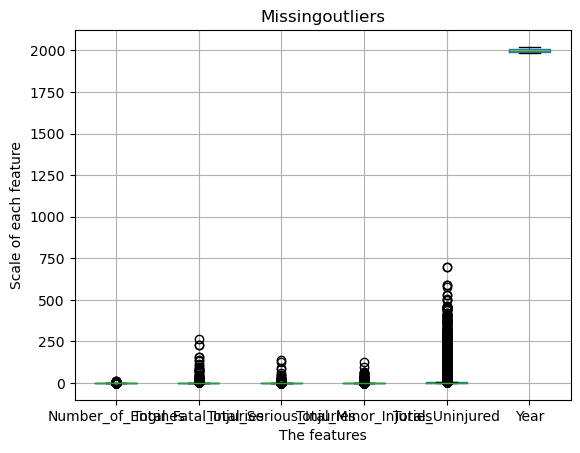

In [47]:
# using matplotlib to check for the outliers
df.boxplot()

#plot title
plt.title('Missingoutliers')
#plot labels
plt.xlabel("The features")
plt.ylabel("Scale of each feature")

plt.show()

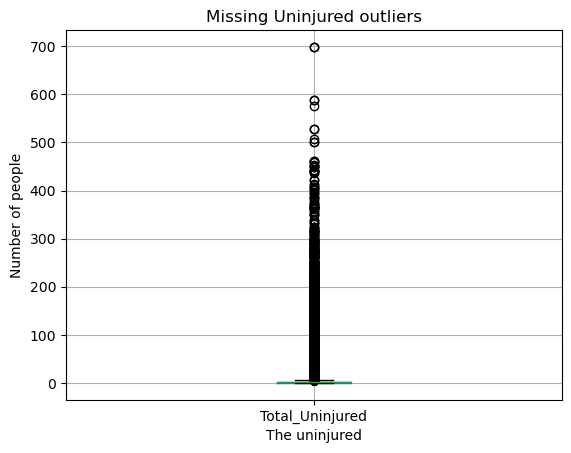

In [48]:
# Total uninjured people column has the most outliers
df.boxplot(column = ['Total_Uninjured'])

#plot title
plt.title('Missing Uninjured outliers')
#plot labels
plt.xlabel("The uninjured")
plt.ylabel("Number of people")

plt.show()

In [49]:
# to handle the outlier we would have used the interquatile method but since this is the count of uninjured persons, it make sense to have outliers

In [50]:
# check if the key columns for the EDA are still present
'''
Event Details:
  Event.Id, Event.Date, Location, Country, Weather.Condition, Broad.phase.of.flight
Aircraft Details:
  Make, Model, Aircraft.damage, Aircraft.Category, Number.of.Engines, Engine.Type
Injury and Severity:
  Injury.Severity, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured
Operational Context:
  Purpose.of.flight
'''

df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_damage',
       'Registration_Number', 'Make', 'Model', 'Amateur_Built',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status', 'Year', 'City', 'State'],
      dtype='object')

### Exporting the cleaned Dataset

In [51]:
# Let's export our dataframe into a csv file as shown
df.to_csv('AviationData_cleaned.csv')

# Exploratory Data Analysis

## 1. Identifying Aircraft with the Lowest risk

In [52]:
#Load the cleaned Data
df = pd.read_csv('AviationData_cleaned.csv')

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,82125.0,42747.137023,25362.620997,7.0,20798.0,41953.0,64316.000000,88888.0
Number_of_Engines,82125.0,1.132505,0.423053,0.0,1.0,1.0,1.000000,8.0
Total_Fatal_Injuries,82125.0,0.436637,2.272425,0.0,0.0,0.0,0.541084,265.0
Total_Serious_Injuries,82125.0,0.258182,1.062820,0.0,0.0,0.0,0.265453,137.0
Total_Minor_Injuries,82125.0,0.333682,1.219245,0.0,0.0,0.0,0.338968,125.0
Total_Uninjured,82125.0,4.303138,22.852245,0.0,0.0,1.0,2.000000,699.0
Year,80668.0,1998.055809,11.481453,1982.0,1988.0,1997.0,2007.000000,2022.0


In [54]:
df.describe(include = 'O')

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Registration_Number,Make,Model,Amateur_Built,Engine_Type,Purpose_of_flight,Weather_Condition,Broad_phase_of_flight,Report_Status,City,State
count,83582,83582,83580,82125,82125,82125,82125,82125,82125,82125,82125,82125,82125,82125,82125,82125,82125,80663,80606
unique,81260,1102,82161,14600,23014,1,7,4,74043,7374,11395,3,11,26,3,12,16898,17340,75
top,2018,Accident,TX,1982-05-16,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,NONE,Cessna,152,No,Reciprocating,Personal,VMC,Unknown,Probable Cause,ANCHORAGE,CA
freq,202,79831,160,25,434,82125,64829,61624,343,25847,2323,73833,71431,48477,75210,21574,61084,434,8714


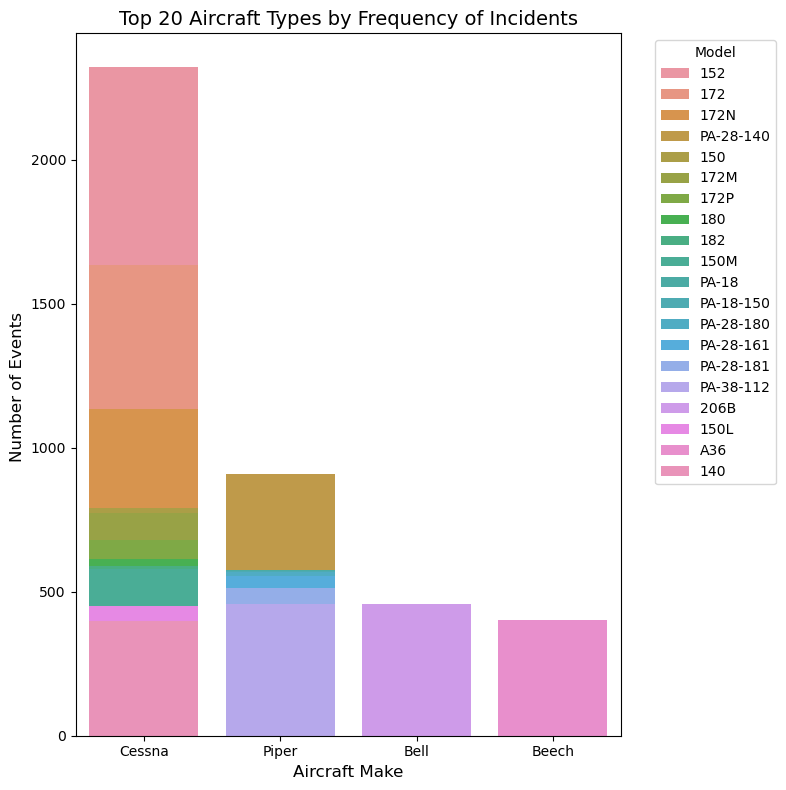

In [55]:
# We can identify the aircrafts by their make and model
# using matplotlib, lets have bar plots of the make and model against the events

# Aggregate the data: count the number of incidents per Make and Model
event_counts = df.groupby(['Make', 'Model']).size().reset_index(name='Event_Count')

# Sort the data for better visualization (e.g., top 20 by event count)
top_event_counts = event_counts.sort_values(by='Event_Count', ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(8, 8))
sns.barplot(
    x='Make', 
    y='Event_Count', 
    hue='Model', 
    data=top_event_counts, 
    dodge=False, 
)

# Labels and title
plt.title('Top 20 Aircraft Types by Frequency of Incidents', fontsize=14)
plt.xlabel('Aircraft Make', fontsize=12)
plt.ylabel('Number of Events ', fontsize=12)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

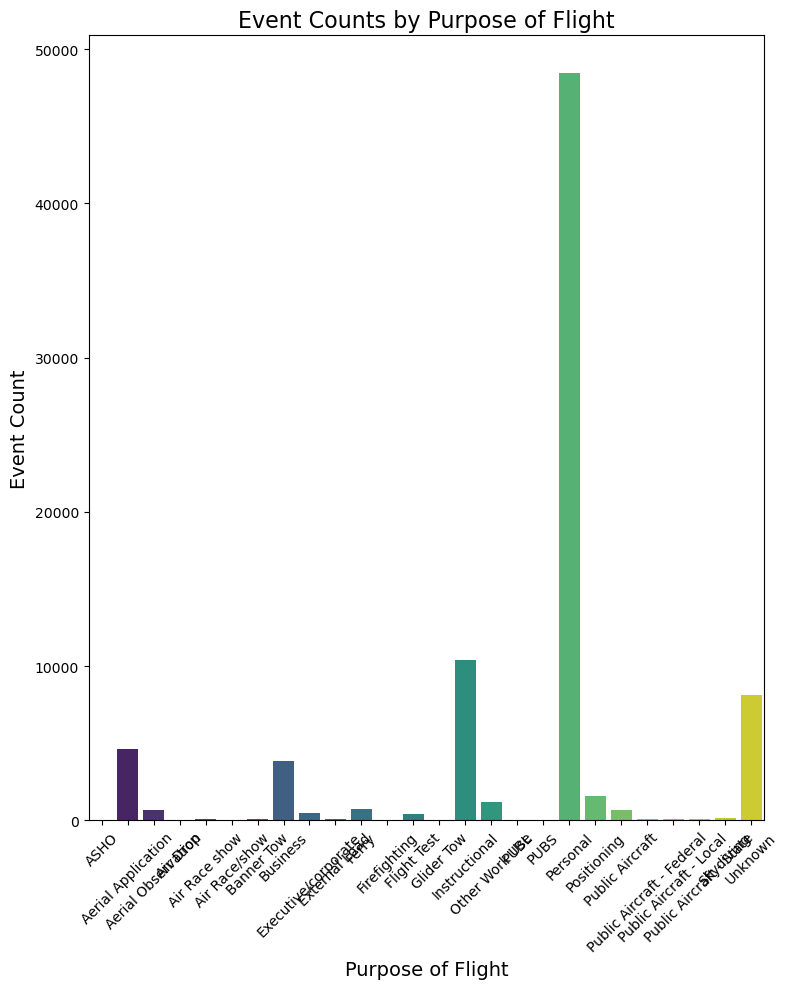

In [56]:
# we need to know the number of events that occured for each aircraft category and the purpose of flight 
purpose_counts = df.groupby('Purpose_of_flight').size().reset_index(name='Event_Count')

# Bar plot for Purpose of Flight
plt.figure(figsize=(8, 10))
sns.barplot(
    x='Purpose_of_flight', 
    y='Event_Count', 
    data=purpose_counts, 
    palette='viridis'
)

# Adding labels and title
plt.title('Event Counts by Purpose of Flight', fontsize=16)
plt.xlabel('Purpose of Flight', fontsize=14)
plt.ylabel('Event Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [57]:
# Lets check on the number of accidents/ events per year

events_per_year = df.groupby(['Year'], as_index = False)['Event_Id'].count()
events_per_year

,Year,Event_Id
0,1982.0,3564
1,1983.0,3524
2,1984.0,3418
3,1985.0,3066
4,1986.0,2845
5,1987.0,2770
6,1988.0,2660
7,1989.0,2495
8,1990.0,2464
9,1991.0,2404


/home/bev/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bev/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


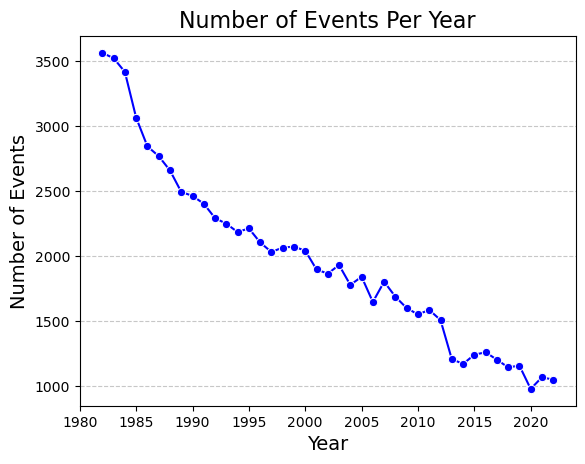

In [58]:
# we can have a line plot for the number of events per year using seaborn and matplotlib
# Plotting the line plot
# plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year', 
    y='Event_Id', 
    data=events_per_year, 
    marker='o', 
    color='blue',
)

# Adding labels and title
plt.title('Number of Events Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

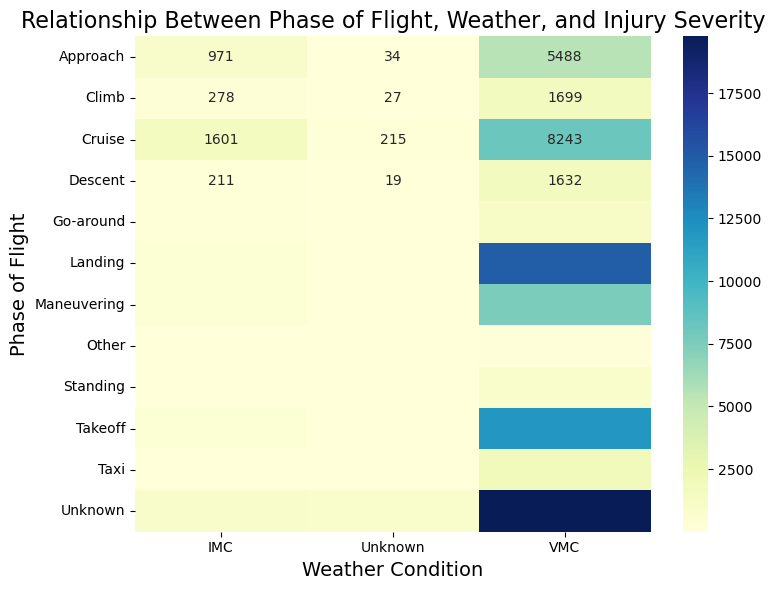

'\nInstrument meteorological conditions (IMC) \nare meteorological conditions expressed in terms of visibility, distance from cloud, and ceiling, \nless than the minima specified for visual meteorological conditions (VMC)\n'

In [59]:
# finding pattern related to the phase of flight, weather conditiond and injury severity
# lets first group the broad phase of flight and the number of incidents then examine the injury severity of each flight phase
# after we can compare how the weather conditions affected each event count and severity

phase_weather_injury = df.pivot_table(
    index='Broad_phase_of_flight', 
    columns='Weather_Condition', 
    values='Injury_Severity', 
    aggfunc='count'
)

# ploting
plt.figure(figsize=(8, 6))
sns.heatmap(phase_weather_injury, annot=True, fmt='d', cmap='YlGnBu')

# plot labels
plt.title('Relationship Between Phase of Flight, Weather, and Injury Severity', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Phase of Flight', fontsize=14)
plt.tight_layout()

plt.show()

# to note
'''
Instrument meteorological conditions (IMC) 
are meteorological conditions expressed in terms of visibility, distance from cloud, and ceiling, 
less than the minima specified for visual meteorological conditions (VMC)
'''

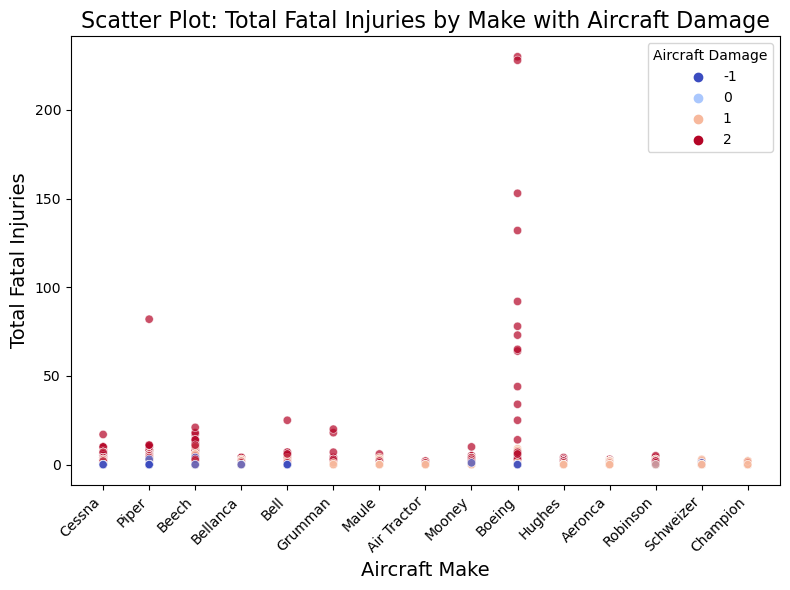

In [60]:
# Examining the correlation between aircraft damage and make or model
# Create a copy of the subset of data for visualization
scatter_data = df[['Make', 'Model', 'Total_Fatal_Injuries', 'Aircraft_damage']].copy()

# Count the number of incidents per make
top_makes = df['Make'].value_counts().nlargest(15).index

# Filter the data to include only the top 15 makes
scatter_data = scatter_data[scatter_data['Make'].isin(top_makes)]

# Convert 'Aircraft_damage' to numeric for better visualization
damage_mapping = {
    'Destroyed': 2,
    'Substantial': 1,
    'Minor': 0,
    'Unknown': -1  # Optional, for missing/unknown values
}
scatter_data['Aircraft_damage_numeric'] = scatter_data['Aircraft_damage'].map(damage_mapping)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=scatter_data,
    x='Make', 
    y='Total_Fatal_Injuries',
    hue='Aircraft_damage_numeric',
    palette='coolwarm',
    alpha=0.7
)

# Add labels and title
plt.title('Scatter Plot: Total Fatal Injuries by Make with Aircraft Damage', fontsize=16)
plt.xlabel('Aircraft Make', fontsize=14)
plt.ylabel('Total Fatal Injuries', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Aircraft Damage')
plt.tight_layout()

plt.show()

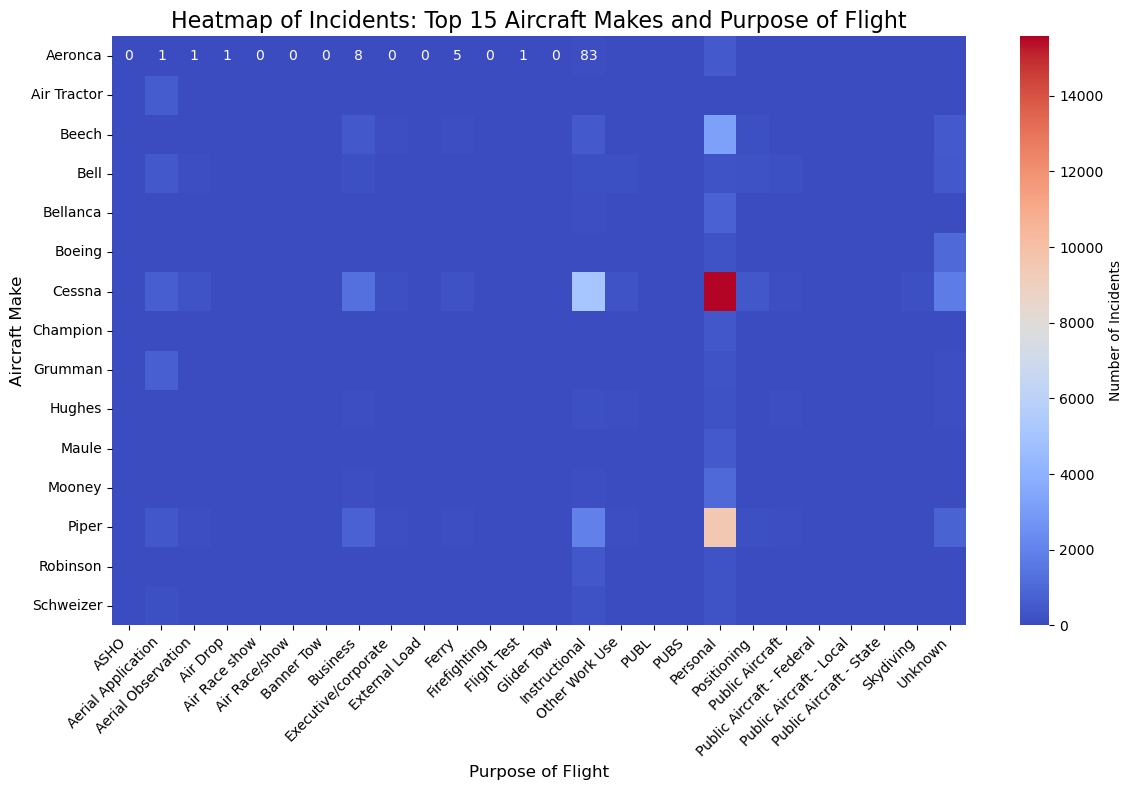

In [61]:
# Heatmap of Incidents
# Filter the top 15 makes with the highest number of incidents
top_15_makes = df['Make'].value_counts().head(15).index
filtered_data = df[df['Make'].isin(top_15_makes)]

# Create a pivot table
heatmap_data = filtered_data.pivot_table(index='Make', columns='Purpose_of_flight', 
                                         values='Event_Id', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', cbar_kws={'label': 'Number of Incidents'})

# Add labels and title
plt.title('Heatmap of Incidents: Top 15 Aircraft Makes and Purpose of Flight', fontsize=16)
plt.xlabel('Purpose of Flight', fontsize=12)
plt.ylabel('Aircraft Make', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

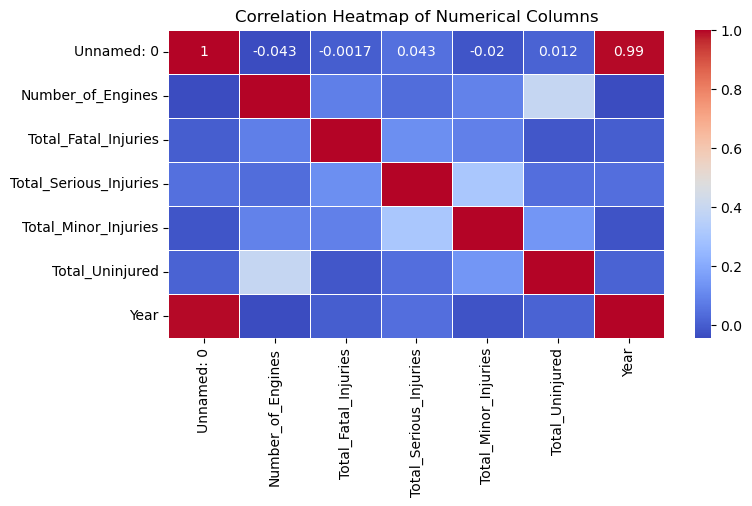

In [62]:
# A correlation heatmap of numerical values 
numerical_data = df.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

#plotting
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')

plt.show()

## Conclusion
### Observations
1. **Most Common Aircraft Makes**: 
    Top 15 aircraft makes account for 68.44% of the number of incidents.
    The Boeing Aircraft Make has the highest amount of fatal injuries with the aircraft being desroyed.
2. **Purpose of Flight**: 
    Incidents are more frequent during personal flights compared to business or commercial operations.  
3. **Flight Phases**: 
    Takeoff, landing and maneuvering phases are the most critical, with higher probabilities of incidents.  
4. **Weather Conditions**: 
    Events are significantly higher during adverse weather conditions, particularly under Visual Meteorological Conditions (VMC).  
5. **Severity Trends**: 
    Fatalities and severe injuries are more likely in takeoff and maneuvering flight phases and during adverse weather.

### Recommendations
1. **Aircraft Selection**:  
   - Focus on acquiring aircraft with lower incident frequencies and lower severity ratings.  
   - Prioritize makes and models with strong safety performance records.
   - Consider the aircraft make with the least amount of damage during the incidents.

2. **Safety Enhancements**:  
   - Develop targeted training programs for pilots to handle takeoff, landing and maneuvering more effectively.  
   - Emphasize safety measures and emergency preparedness during adverse weather conditions.

3. **Operational Focus**:  
   - Encourage the use of aircraft for commercial and business flights where risks are relatively lower.  
   - Optimize flight schedules to minimize operations during high-risk weather conditions.

4. **Continuous Monitoring**:  
   - Establish a framework to track and analyze incidents continuously to adapt to emerging trends and risks.  
   - Invest in robust data systems for real-time risk assessment.

### Final Thoughts
By leveraging historical aviation event data, 
we can make informed decisions about which aircraft to purchase and how to optimize safety operations. 
These insights empower stakeholders to minimize risks and align the new aviation division with long-term safety 
and performance goals.